In [1]:
######################################
# Run First Cell for Initialization  #
#                                    #
#           SHIFT + ENTER            #
######################################

# Initialize notebook
%run -i ./code/03_kinetics/initialize
# Load functions in external python scripts
%load_ext autoreload
%autoreload 1
%aimport refresh
display(Javascript("Jupyter.notebook.execute_cells([3,4,5,7,13,14,15,18,19])"))

<IPython.core.display.Javascript object>

# Stress Tensors

The stress tensor defines the state of stress at a given point. It is a tensor-valued quantity of order two.
The Cauchy stress tensor can be represented by the matrix

\begin{equation}
\boldsymbol{\sigma}=
 \begin{bmatrix}
   \sigma_{11} & \sigma_{12} & \sigma_{13} \\
   \sigma_{21} & \sigma_{22} & \sigma_{23} \\
   \sigma_{31} & \sigma_{32} & \sigma_{33}
   \end{bmatrix}
   \end{equation}
   
The main diagonal elements correspond to the normal stresses, the diagonal elements correspond to the shear stresses.
   
<img src="files/code/03_kinetics/stress_tensor_components.JPG" alt="Drawing" style="width: 300px;"/>

When we cut a body by a plane surface with normal vector $\boldsymbol{n}$, we get surface traction vectors $\boldsymbol{t}$ on that plane. Cauchy's stress theorem connects normal vector and resulting traction vector at a point $\boldsymbol{x}$ by

\begin{equation}
\boldsymbol{t}\left(\boldsymbol{x},\;t,\;\boldsymbol{n}\right)=\boldsymbol{\sigma}\left(\boldsymbol{x},\;t\right)\boldsymbol{n}
\end{equation}

<img src="files/code/03_kinetics/cauchy_theorem.JPG" alt="Drawing" style="width: 250px;"/>

A stress tensor can be formulated with respect to different configurations - e.g. the undeformed reference configuration or the deformed current configuration. The Cauchy stress relates to the deformed configuration, the First Piola-Kirchhoff stress to the undeformed configuration. With the balance of angular momentum it can be shown that the Cauchy stress tensor is always symmetric. The First Piola Kirchhoff stress tensor is in general not symmetric.
An adaption of the latter tensor leads to the Second Piola Kirchhoff stress tensor, which relates to no physical configuration, but is always symmetric.

The stress tensors are related by

\begin{equation}
\begin{aligned}
\text{Cauchy}&\;\;\;\boldsymbol{\sigma}
\\
\text{First Piola-Kirchhoff}&\;\;\;\boldsymbol{P}=J\boldsymbol{\sigma}\boldsymbol{F}^{-T}
\\
\text{Second Piola-Kirchhoff}&\;\;\;\boldsymbol{S}=\boldsymbol{F}^{-1}\boldsymbol{P}
\end{aligned}
\end{equation}

The selection of the stress tensor depends on the desired application. For experimental tensile tests it may be more comfortable to calculate the First Piola Kirchhoff stress, while in computational engineering the symmetric Second Piola Kirchhoff stress is favored.

Regarding purely mechanical processes, stress is caused by deformation. The connection between deformation and resulting stress is given by constitutive equations. The most simple constitutive equation for finite deformations is given by the St. Venant-Kirchhoff stress

\begin{equation}
\boldsymbol{S}=2\cdot\mu\cdot\boldsymbol{E}+\lambda\cdot\text{tr}\left(\boldsymbol{E}\right)\cdot\boldsymbol{I}
\end{equation}

which is an extension for finite deformations of the linear elastic Hooke's law for small deformations.


In the following example, the St. Venant-Kirchhoff stress for an incompressible body is evaluated. The tensile and shear components in the plane can be variated. The third tensile component is then calculated by the incompressibility condition, and in the third direction the shear deformation is zero.

The three introduced stress tensors are evaluated, as well as the eigenvalues and eigendirections of the Second Piola-Kirchhoff and the Cauchy stress. The eigenvectors of both are plotted. As they refer to different configurations, the directions of the eigenvectors are also different.

In [2]:
%run -i ./code/03_kinetics/F_input

interactive(children=(FloatSlider(value=1.0, description='F11', max=2.0, min=0.5), FloatSlider(value=1.0, desc…

Button(description='Refresh', style=ButtonStyle())

In [3]:
%run -i ./code/03_kinetics/stress_tensors_eval

Second Piola Kirchhoff Tensor

S=
[[1.440 3.600 0.000]
 [3.600 0.360 0.000]
 [0.000 0.000 0.360]]


First Piola Kirchhoff Stress Tensor

P =
[[1.440 3.600 0.000]
 [4.032 1.440 0.000]
 [0.000 0.000 0.360]]


Cauchy Stress Tensor

sigma =
[[1.440 4.032 0.000]
 [4.032 2.650 0.000]
 [0.000 0.000 0.360]]


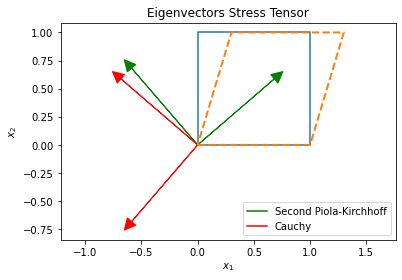

Eigenvalues S
[4.540 -2.740 0.360]

Eigenvectors S (ordered in columns)
[[0.758 -0.653 0.000]
 [0.653 0.758 0.000]
 [0.000 0.000 1.000]]


Eigenvalues sigma
[-2.032 6.122 0.360]

Eigenvectors sigma (ordered in columns)
[[-0.758 -0.653 0.000]
 [0.653 -0.758 0.000]
 [0.000 0.000 1.000]]


In [4]:
%matplotlib inline
%run -i ./code/03_kinetics/stress_tensors_eigenvectors

For small deformations, the stress tensors coincide. For large deformations, the differences become quite significant. 

Below, some experimental rubber data from Treloar (1944) is shown.
Especially for materials like rubber, which can experience large deformations, it is important to specify the choosen stress tensor.

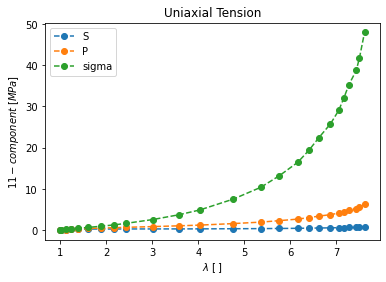

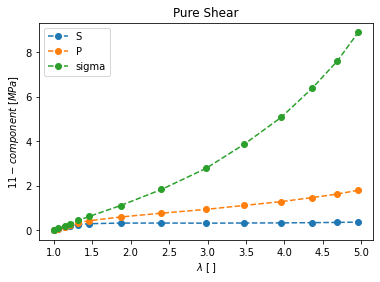

In [5]:
%matplotlib inline
%run -i ./code/03_kinetics/stress_tensor_treloar

# Material Symmetry

Visualization of Anisotropy

Show which components of the elasticity tensor must be equal

In [ ]:
Plot Material Symmetry

# Deviatoric and Hydrostatic Stress

A stress tensor $\boldsymbol{\sigma}$ can be additive composed into a deviatoric part $\boldsymbol{\sigma}^{dev}$ and a hydrostatic part $\boldsymbol{\sigma}^{hyd}$. 

\begin{equation}
\boldsymbol{\sigma}=\boldsymbol{\sigma}^{dev}+\boldsymbol{\sigma}^{hyd}
\end{equation}

with

\begin{equation}
\begin{aligned}
\boldsymbol{\sigma}^{hyd}&=p\cdot\boldsymbol{I}
\\
\boldsymbol{\sigma}^{dev}&=\boldsymbol{\sigma}-p\cdot\boldsymbol{I}
\end{aligned}
\end{equation}

with the hydrostatic pressure $p$ and the second order unit tensor $\boldsymbol{I}$. As it can be seen from the definition of the hydrostatic pressure $p$  

\begin{equation}
p=\text{trace}\left(\boldsymbol{\sigma}\right)\cdot\frac{1}{3}=\left(\sigma_1+\sigma_2+\sigma_3\right)\cdot\frac{1}{3}
\end{equation}

the trace of the deviatoric part is zero.

This decomposition is applicated in e.g. material modeling. Experimental investigations regarding plasticity and fracture often show an predominant influence of the deviatoric deformation, with practically no influence of the hydrostatic pressure.


In the following example the deviatoric decomposition for an arbitrary Cauchy stress tensor is demonstrated. The result is plotted in the principal stress system. The hydrostatic part runs along the (1,1,1)-axis. Orthogonal to that axis lies the so called Pi-plane. Since it is orthogonal to the hydrostatic axis, the stresses that lie within the Pi-plane exhibit no hydrostatic part. The deviatoric part of the stress lies within the Pi-plane.

In [6]:
%run -i ./code/03_kinetics/sig_input

interactive(children=(FloatSlider(value=1.0, description='sig_11', max=2.0), FloatSlider(value=0.0, descriptio…

Button(description='Refresh', style=ButtonStyle())

In [7]:
%run -i ./code/03_kinetics/sig_output

Cauchy Stress Tensor

sigma =
[[1.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 0.000]]


Hydrostatic Cauchy Stress Tensor

p*I =
[[0.333 0.000 0.000]
 [0.000 0.333 0.000]
 [0.000 0.000 0.333]]


Deviatoric Cauchy Stress Tensor

sigma_dev =
[[0.667 1.000 0.000]
 [1.000 -0.333 0.000]
 [0.000 0.000 -0.333]]


<IPython.core.display.Javascript object>


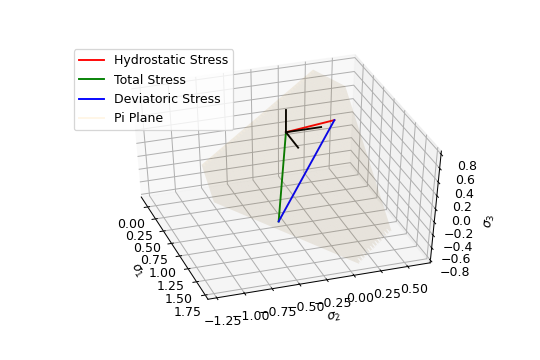

In [8]:
%matplotlib notebook
%run -i ./code/03_kinetics/stress_space_plot

# Hyperelasticity

A material is called to behave elastic when there is no dissipation of energy during arbitrary deformation processes, which is equivalent to path independence of the deformation. A direct consequence of that is the independence of the deformation rate.

The fourth order elasticity tensor $\mathbb{C}$ gives a linear mapping between the second order stress tensor $\boldsymbol{S}$ and the second order strain tensor $\boldsymbol{E}$.

\begin{equation}
\boldsymbol{S}=\mathbb{C}:\boldsymbol{E}
\end{equation}

In order to produce a path independent stress tensor, the elasticity tensor must possess the so called major symmetry

\begin{equation}
C_{ijkl}=C_{klij}
\end{equation}

which is often referred to as the definition of hyperelasticity. As the strain tensors introduced in this lecture are also symmetric, the elasticity tensor also possesses the so called minor symmetries

\begin{equation}
C_{ijkl}=C_{jikl}=C_{ijlk}
\end{equation}

Without symmetries, the elasticity tensor has 81 independent components. After consideration of the symmetries, only 21 independent components remain.


The energy stored in hyperelastic materials can be expressed with a energy function $W$ such that

\begin{equation}
\boldsymbol{S}=\frac{\partial W}{\partial \boldsymbol{E}}
\end{equation}

which must fulfill several physical conditions: zero strain must produce zero stress and zero stored energy, while an arbitrary strain unequal zero must result in a stored energy greater than zero. Furthermore, for small deformations it must be consistent with linear elasticity.

Strain energy functions are often expressed in terms of principal stretches or invariants of strain tensors. Thereby the model is independent of the observer, which is another important physical condition.

Some simple forms of hyperelastic strain energy functions are the Neo-Hooke model

\begin{equation}
\begin{aligned}
W&=c_1\left(I_1-3\right)
\\
&=c_1\left(\lambda_1^2+\lambda_2^2+\lambda_3^2-3\right)
\end{aligned}
\end{equation}

the Mooney-Rivlin model

\begin{equation}
\begin{aligned}
W&=c_1\left(I_1-3\right)+c_2\left(I_2-3\right)
\\
&=c_1\left(\lambda_1^2+\lambda_2^2+\lambda_3^2-3\right)+c_2\left(\lambda_1^2\lambda_2^2+\lambda_1^2\lambda_3^2+\lambda_2^2\lambda_3^2-3\right)
\end{aligned}
\end{equation}

and the Ogden model

\begin{equation}
W=\sum_{p=1}^{N}\frac{\mu_p}{\alpha_p}\left(\lambda_1^{\alpha_p}+\lambda_2^{\alpha_p}+\lambda_3^{\alpha_p}-3\right)
\end{equation}

The Ogden model is a polynomial fit with an arbitrary number $N$ of terms, often $N=3$ is the limit in practical usage. While the Ogden model is purely phenomenological, the Neo-Hooke model and the Mooney-Rivlin model can be deduced from physical considerations regarding the micro structure of rubber.


Hyperelastic models are often used to describe the elastic behavior of rubber, which is nearly incompressible. With the incompressibility condition, the principal stresses can be expressed with

\begin{equation}
\sigma_a=\lambda_a\frac{\partial W}{\partial \lambda_a}-p,\;\;a=1,2,3
\end{equation}

where $p$ is a Lagrangian multiplier. The scalar $p$ must be determined from the equilibrium equations, boundary conditions and incompressibilbity condition (see task 4).


In the following example, different hyperelastic strain energy functions are adapted to experimental rubber data [Treloar (1944), Steinmann (2012)]. The models were fitted to uniaxial tension, equibiaxial tension and pure shear data.

The pure shear deformation is applied in the form


\begin{equation}
\boldsymbol{F}=
 \begin{bmatrix}
   \lambda & 0 & 0 \\
   0 & 1 &0 \\
   0 & 0& \lambda^{-1}
   \end{bmatrix}
   \end{equation}

In [9]:
%run -i ./code/03_kinetics/treloar_data_selection

Checkbox(value=True, description='Neo-Hooke', indent=False)

Checkbox(value=False, description='Mooney-Rivlin', indent=False)

Checkbox(value=False, description='Ogden (n=1)', indent=False)

Checkbox(value=False, description='Ogden (n=2)', indent=False)

Checkbox(value=False, description='Ogden (n=3)', indent=False)

Button(description='Refresh', style=ButtonStyle())

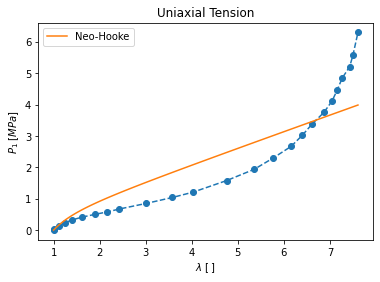

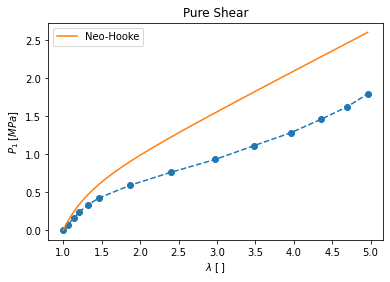

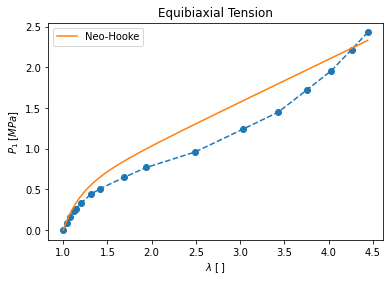

In [10]:
%matplotlib inline
%run -i ./code/03_kinetics/treloar_data_fit

# Further Information

Holzapfel, G. (2000). Nonlinear solid mechanics: a continuum approach for engineering.

Treloar, L.R.G. (1944). Stress-strain data for vulcanised rubber under various types of deformation.

Treloar, L.R.G. (1975). The Physics of Rubber Elasticity.

Steinmann, P. et al. (2012). Hyperelastic models for rubber-like materials: consistent tangent operators and suitability for Treloar's data.

Böhlke, T. et al. (2001). Graphical Representation of the Generalized Hooke's Law.